In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sweetviz as sw
import seaborn as sns
sns.set()

In [2]:
num_columns=[ 'ssc_p', 'hsc_p', 'degree_p',
       'etest_p', 'mba_p']
cat_columns=['gender', 'ssc_b', 'hsc_b','Arts', 'Commerce', 'Comm&Mgmt', 'Sci&Tech', 'workex', 'specialisation']

In [3]:
data=pd.read_csv('Placement.csv')
data=data.drop(['sl_no','salary'],axis=1)
data['status']=data['status'].map({'Placed':1,'Not Placed':0})
data[num_columns]=data[num_columns].apply(lambda x: x/100.)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,0.6700,Others,0.9100,Others,Commerce,0.5800,Sci&Tech,No,0.550,Mkt&HR,0.5880,1
1,M,0.7933,Central,0.7833,Others,Science,0.7748,Sci&Tech,Yes,0.865,Mkt&Fin,0.6628,1
2,M,0.6500,Central,0.6800,Central,Arts,0.6400,Comm&Mgmt,No,0.750,Mkt&Fin,0.5780,1
3,M,0.5600,Central,0.5200,Central,Science,0.5200,Sci&Tech,No,0.660,Mkt&HR,0.5943,0
4,M,0.8580,Central,0.7360,Central,Commerce,0.7330,Comm&Mgmt,No,0.968,Mkt&Fin,0.5550,1


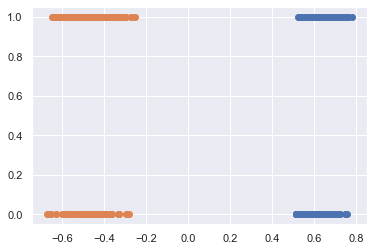

In [4]:
plt.scatter(data['mba_p'],data['status'])
plt.scatter(np.log(data['mba_p']),data['status'])

In [5]:
data['status'].value_counts()

1    148
0     67
Name: status, dtype: int64

In [6]:
data['gender']=data['gender'].map({'M':0,'F':1})
data['ssc_b']=data['ssc_b'].map({'Others':0,'Central':1})
data['hsc_b']=data['hsc_b'].map({'Others':0,'Central':1})
data['workex']=data['workex'].map({'Yes':0,'No':1})
data['specialisation']=data['specialisation'].map({'Mkt&HR':0,'Mkt&Fin':1})
dummy_1=data['hsc_s'].str.get_dummies().drop(['Science'],axis=1)
dummy_2=data['degree_t'].str.get_dummies().drop(['Others'],axis=1)
data=data.drop(['hsc_s','degree_t'],axis=1)
data=pd.concat([data,dummy_1,dummy_2],axis=1)
data=data[num_columns+cat_columns+['status']]
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender,ssc_b,hsc_b,Arts,Commerce,Comm&Mgmt,Sci&Tech,workex,specialisation,status
0,0.6700,0.9100,0.5800,0.550,0.5880,0,0,0,0,1,0,1,1,0,1
1,0.7933,0.7833,0.7748,0.865,0.6628,0,1,0,0,0,0,1,0,1,1
2,0.6500,0.6800,0.6400,0.750,0.5780,0,1,1,1,0,1,0,1,1,1
3,0.5600,0.5200,0.5200,0.660,0.5943,0,1,1,0,0,0,1,1,0,0
4,0.8580,0.7360,0.7330,0.968,0.5550,0,1,1,0,1,1,0,1,1,1


In [7]:
numerical=data[num_columns]
categorical=data[cat_columns]
targets=data['status']
mean=targets.mean()
std=targets.std()

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical=scaler.fit_transform(numerical)
numerical=pd.DataFrame(data=numerical,columns=num_columns)
data=pd.concat([numerical,categorical],axis=1)
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender,ssc_b,hsc_b,Arts,Commerce,Comm&Mgmt,Sci&Tech,workex,specialisation
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,0,0,0,0,1,0,1,1,0
1,1.113369,1.103448,1.513267,1.087157,0.687620,0,1,0,0,0,0,1,0,1
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,0,1,1,1,0,1,0,1,1
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,0,1,1,0,0,0,1,1,0
4,1.712332,0.668391,0.943909,1.864806,-1.164676,0,1,1,0,1,1,0,1,1


In [9]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(data,targets,test_size=(0.1),random_state=42)
#Xtrain,Xval,ytrain,yval=train_test_split(Xtrain,ytrain,test_size=(297./2675.),random_state=43)

In [16]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(solver='lbfgs',penalty='none')
log.fit(Xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[[ 5  2]
 [ 2 13]]


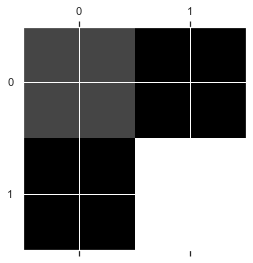

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,log.predict(Xtest))
print(cm)
plt.matshow(cm,cmap=plt.cm.gray)

In [20]:
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(ytest,log.predict(Xtest)))
print(recall_score(ytest,log.predict(Xtest)))
print(f1_score(ytest,log.predict(Xtest)))

0.8666666666666667
0.8666666666666667
0.8666666666666667


0.7904761904761906


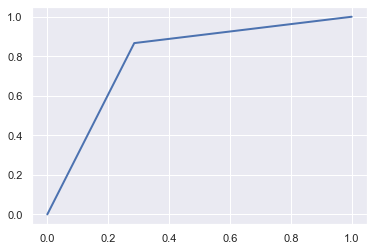

In [25]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(ytest,log.predict(Xtest))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,0],[1,1],'k--')
print(roc_auc_score(ytest,log.predict(Xtest)))

In [26]:
log.intercept_

array([4.21502998])

In [30]:
weights=pd.DataFrame(data=log.coef_.reshape(-1,1),index=list(data.columns),columns=['Weights'])
weights['Insight']=np.exp(weights['Weights'])
weights

,Weights,Insight
ssc_p,2.937036,18.859861
hsc_p,1.400232,4.056140
degree_p,1.629857,5.103146
etest_p,-0.341825,0.710472
mba_p,-1.387954,0.249586
gender,-1.945794,0.142874
ssc_b,-0.318431,0.727289
hsc_b,-0.002812,0.997192
Arts,1.311364,3.711233
Commerce,-0.773311,0.461483
